In [2]:
# Projet ParisHousingClass


In order to complete this part of the practical, please be sure to use Google Colab.
To complete the code, you may use `help_kmeans.ipynb`  for help.
___
It is **important to note that we will NOT use the labels for the K-means clustering algorithm, since it is an unsupervised learning algorithm.** 

In this study we will use the labels to evaluate the k-means clustering results.

### Link Google Colab notebook to drive folder. 

In order to read the data file from your drive, make sure you are in the correct directory. You can change the path using the os.chdir command.  

In [3]:
#import os 
#from google.colab import drive
#drive.mount('/content/drive', force_remount = True)
#os.chdir('drive/MyDrive/') #main folder of Google Drive account

### Import Libraries

**Import the libraries you usually use for data analysis.**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
### Get the Data
##Read in the "ParisHousingClass" file using read_csv.**

In [6]:
df = pd.read_csv('ParisHousingClass.csv', header=0)

**Check the head of the data**

In [7]:
df.head();

print(df.head());

   squareMeters  numberOfRooms  hasYard  hasPool  floors  cityCode  \
0         75523              3        0        1      63      9373   
1         80771             39        1        1      98     39381   
2         55712             58        0        1      19     34457   
3         32316             47        0        0       6     27939   
4         70429             19        1        1      90     38045   

   cityPartRange  numPrevOwners  made  isNewBuilt  hasStormProtector  \
0              3              8  2005           0                  1   
1              8              6  2015           1                  0   
2              6              8  2021           0                  0   
3             10              4  2012           0                  1   
4              3              7  1990           1                  0   

   basement  attic  garage  hasStorageRoom  hasGuestRoom      price category  
0      4313   9005     956               0             7  7559081.5

**Check the info() and describe() methods on the data**

In [8]:
print(df.info());

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [9]:
print(df.describe());

       squareMeters  numberOfRooms       hasYard       hasPool        floors  \
count   10000.00000   10000.000000  10000.000000  10000.000000  10000.000000   
mean    49870.13120      50.358400      0.508700      0.496800     50.276300   
std     28774.37535      28.816696      0.499949      0.500015     28.889171   
min        89.00000       1.000000      0.000000      0.000000      1.000000   
25%     25098.50000      25.000000      0.000000      0.000000     25.000000   
50%     50105.50000      50.000000      1.000000      0.000000     50.000000   
75%     74609.75000      75.000000      1.000000      1.000000     76.000000   
max     99999.00000     100.000000      1.000000      1.000000    100.000000   

           cityCode  cityPartRange  numPrevOwners         made    isNewBuilt  \
count  10000.000000   10000.000000   10000.000000  10000.00000  10000.000000   
mean   50225.486100       5.510100       5.521700   2005.48850      0.499100   
std    29006.675799       2.872024     

### Data Preparation

In [10]:
# Separate the labels from the variables
# Separate the labels (class) from the variables
#on veut prédire la variable "hasYard" en fonction des autres variables
df_v2 = df.drop("category",axis=1);


print(df_v2.info());

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [11]:
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import MinMaxScaler, StandardScaler
#remplace toutes les valeurs nulles par la médiane  (on aurait pu utiliser la moyenne)  et normalise les données entre 0 et 1 (MinMaxScaler)
#évite de poluer les données avec des valeurs nulles

missing_values = df_v2.isnull().sum()
imputer = SimpleImputer(missing_values= np.nan , strategy='mean')
df_numeric_traite = pd.DataFrame (imputer.fit_transform(df_v2), columns=df_v2.columns)
imputer.fit(df_numeric_traite)
min_max_scaler = MinMaxScaler()
df_numeric_traite = pd.DataFrame(min_max_scaler.fit_transform(df_numeric_traite), columns=df_numeric_traite.columns)
df_numeric_traite



,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,0.755020,0.020202,0.0,1.0,0.626263,0.093747,0.222222,0.777778,0.483871,0.0,1.0,0.4313,0.900490,0.951111,0.0,0.7,0.755144
1,0.807547,0.383838,1.0,1.0,0.979798,0.393977,0.777778,0.555556,0.806452,1.0,0.0,0.3653,0.243524,0.031111,1.0,0.2,0.807854
2,0.556731,0.575758,0.0,1.0,0.181818,0.344712,0.555556,0.777778,1.000000,0.0,0.0,0.2937,0.885189,0.038889,1.0,0.9,0.556630
3,0.322560,0.464646,0.0,0.0,0.050505,0.279500,1.000000,0.333333,0.709677,0.0,1.0,0.0659,0.714071,0.287778,0.0,0.3,0.322339
4,0.704034,0.181818,1.0,1.0,0.898990,0.380610,0.222222,0.666667,0.000000,1.0,0.0,0.8435,0.242824,0.213333,1.0,0.4,0.704723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.016385,0.888889,0.0,1.0,0.040404,0.731666,0.666667,0.555556,0.612903,0.0,1.0,0.9311,0.169717,0.131111,0.0,0.4,0.016617
9996,0.443539,0.282828,1.0,1.0,0.111111,0.346203,0.888889,0.333333,0.000000,0.0,1.0,0.9061,0.174117,0.144444,0.0,0.0,0.443973
9997,0.838274,0.020202,0.0,0.0,0.686869,0.809705,1.000000,1.000000,0.483871,1.0,1.0,0.8304,0.772977,0.272222,1.0,0.9,0.838269
9998,0.590001,0.696970,0.0,0.0,0.959596,0.558809,0.000000,0.222222,0.645161,0.0,1.0,0.2590,0.617362,0.265556,1.0,0.4,0.589688


**Use the info function to make sure the imputer function worked**

In [12]:
df_numeric_traite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  float64
 1   numberOfRooms      10000 non-null  float64
 2   hasYard            10000 non-null  float64
 3   hasPool            10000 non-null  float64
 4   floors             10000 non-null  float64
 5   cityCode           10000 non-null  float64
 6   cityPartRange      10000 non-null  float64
 7   numPrevOwners      10000 non-null  float64
 8   made               10000 non-null  float64
 9   isNewBuilt         10000 non-null  float64
 10  hasStormProtector  10000 non-null  float64
 11  basement           10000 non-null  float64
 12  attic              10000 non-null  float64
 13  garage             10000 non-null  float64
 14  hasStorageRoom     10000 non-null  float64
 15  hasGuestRoom       10000 non-null  float64
 16  price              1000

**Merge the numerical and categorical datasets to get the complete preprocessed dataset in a single dataframe.**

In [13]:
df_traite = df_numeric_traite

### Save final preprocessed dataset

In [14]:
df_traite.to_csv('Td1_projet.csv',index=False)

### K-means model

**Create an instance of a K means model with two clusters**

In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#Donne le meilleur clustering 
def bestAlgoClust (df) : 
    c=[]
    s=[]
    for k in range(2,len(df.columns)):
        c.append(k)
        s.append(silhouette_score(df,KMeans(c[k-2]).fit_predict(df)))
    return c[s.index(max(s))]
        
#kmeans = KMeans(bestAlgoClust(df_traite))
kmeans = KMeans(2)


**Fit the model to all data except for the class label** 

In [16]:
kmeans.fit(df_traite)

KMeans(n_clusters=2)

**What are the cluster center vectors?**

In [17]:
#KMeans(n_clusters=2) 
#chaque cluster est représenté par un point, le centre du cluster
#on peut visualiser les centres des clusters
cluster_centers = kmeans.cluster_centers_

# Add cluster assignments to the DataFrame
df_traite['Cluster'] = kmeans.labels_


**What is the assigned cluster for each patient?**

In [18]:
df_traite

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,Cluster
0,0.755020,0.020202,0.0,1.0,0.626263,0.093747,0.222222,0.777778,0.483871,0.0,1.0,0.4313,0.900490,0.951111,0.0,0.7,0.755144,0
1,0.807547,0.383838,1.0,1.0,0.979798,0.393977,0.777778,0.555556,0.806452,1.0,0.0,0.3653,0.243524,0.031111,1.0,0.2,0.807854,1
2,0.556731,0.575758,0.0,1.0,0.181818,0.344712,0.555556,0.777778,1.000000,0.0,0.0,0.2937,0.885189,0.038889,1.0,0.9,0.556630,1
3,0.322560,0.464646,0.0,0.0,0.050505,0.279500,1.000000,0.333333,0.709677,0.0,1.0,0.0659,0.714071,0.287778,0.0,0.3,0.322339,0
4,0.704034,0.181818,1.0,1.0,0.898990,0.380610,0.222222,0.666667,0.000000,1.0,0.0,0.8435,0.242824,0.213333,1.0,0.4,0.704723,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.016385,0.888889,0.0,1.0,0.040404,0.731666,0.666667,0.555556,0.612903,0.0,1.0,0.9311,0.169717,0.131111,0.0,0.4,0.016617,0
9996,0.443539,0.282828,1.0,1.0,0.111111,0.346203,0.888889,0.333333,0.000000,0.0,1.0,0.9061,0.174117,0.144444,0.0,0.0,0.443973,1
9997,0.838274,0.020202,0.0,0.0,0.686869,0.809705,1.000000,1.000000,0.483871,1.0,1.0,0.8304,0.772977,0.272222,1.0,0.9,0.838269,0
9998,0.590001,0.696970,0.0,0.0,0.959596,0.558809,0.000000,0.222222,0.645161,0.0,1.0,0.2590,0.617362,0.265556,1.0,0.4,0.589688,0


**Create a confusion matrix and classification report to see how well the K-means clustering algorithm worked without being given any labels.**

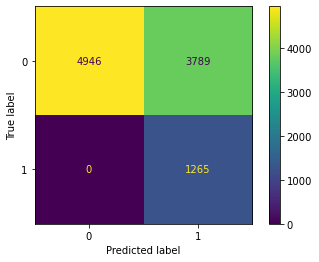

In [19]:
from copy import deepcopy
from sklearn.metrics import ConfusionMatrixDisplay, adjusted_rand_score, confusion_matrix
import numpy as np

#matrice de confusion
df_n = df.copy()
df_n['category'] = pd.factorize(df['category'])[0]
y_true = df_n['category']
y_pred = kmeans.labels_
m = confusion_matrix(y_true, y_pred)
l=df_n['category'].unique()
disp = ConfusionMatrixDisplay(confusion_matrix=m, display_labels=l)
disp.plot()

Les résultats de notre matrice de confusion nous montre que le kmean n'est pas assez performant pour déterminer les classes de notre dataset. 
Le kmean n'est pas adapté. 


### Clustering spectral

In [20]:
from sklearn.cluster import SpectralClustering

sc = SpectralClustering(n_clusters=2)
sc.fit(df_traite)

SpectralClustering(n_clusters=2)

In [ ]:
labels = sc.fit_predict(df_traite)

: 

In [ ]:
plt.scatter(df_traite[:, 0], df_traite[:, 1], c=labels, s=50, cmap='viridis')
plt.title("Résultats de Clustering Spectral")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### Matrice de confusion


In [ ]:
#matrice de confusion
df_n = df.copy()
df_n['category'] = pd.factorize(df['category'])[0]
y_true = df_n['category']
y_pred = sc.labels_
m = confusion_matrix(y_true, y_pred)
l=df_n['category'].unique()
disp = ConfusionMatrixDisplay(confusion_matrix=m, display_labels=l)
disp.plot()

### Clustering hiérarchique 

In [ ]:
from sklearn.cluster import AgglomerativeClustering

hclust = AgglomerativeClustering(linkage='complete')
hclust.fit(df_traite)

In [1]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(8,4))

ax1.settitle("Original")
ax1.scatter(df[:,0],df[:,1],c=labels)

ax2.set_title('Hierarchical Clustering')
ax2.scatter(df[:,0],df[:,1],c=hclust.labels)

plt.show()

NameError: name 'plt' is not defined